# Prehľadávanie mriežky
Ako nájsť optimálne nastavenie klasifikátoru pri predikcii. V prípade napríklad [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): 
- Ako zistiť optimálny počet susedov?
- Ako zistiť, ktorú dištančnú metriku použiť.

Niektoré algoritmi môžu mať až desiatky parametrov na preskúmanie. Ako zistíme, ktoré máme použiť?

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



# Grid search
[Dokumentácia](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [4]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param_dict = { 
    "n_neighbors": list(range(2,30,1)),
    "p": [1,2,3]    
}

grid = GridSearchCV(model, param_dict, cv=3, verbose=3, n_jobs=-1)
# pozor -1 môže spôsobiť problémy s ramkou pozri parameter pre_dispatch
grid_finished = grid.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [10]:
len(list(range(2,30,1)))

28

In [6]:
grid_finished.cv_results_

{'mean_fit_time': array([0.01871864, 0.02183151, 0.02604834, 0.02263792, 0.02202082,
        0.01875846, 0.0193243 , 0.02450323, 0.02089834, 0.02276309,
        0.02267615, 0.01951687, 0.02051274, 0.01626341, 0.01994816,
        0.01938319, 0.02117594, 0.02396313, 0.01819801, 0.02032423,
        0.02068694, 0.02345832, 0.01949485, 0.01686255, 0.0177656 ,
        0.01858123, 0.01811107, 0.01966063, 0.01869448, 0.01734686,
        0.01983333, 0.01919397, 0.01807602, 0.01842324, 0.01818967,
        0.0179836 , 0.01755333, 0.01800879, 0.01721787, 0.03074559,
        0.01975163, 0.01653298, 0.01774128, 0.01632969, 0.0209922 ,
        0.01906411, 0.02250592, 0.01849683, 0.0208319 , 0.02118532,
        0.02000944, 0.01791668, 0.01866849, 0.02049398, 0.0188427 ,
        0.02056289, 0.01998893, 0.01934274, 0.02027615, 0.01796532,
        0.01801864, 0.01950192, 0.01772173, 0.01585809, 0.02040672,
        0.02042429, 0.02078954, 0.01799599, 0.02133266, 0.01933169,
        0.02083834, 0.0183595 ,

In [11]:
grid_finished.best_estimator_

KNeighborsClassifier(n_neighbors=2, p=3)

In [12]:
best_knn = grid_finished.best_estimator_
# neigh.fit(X_train, y_train) 
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9600912200684151
0.9778481012658228
0.8565573770491803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       755
           1       1.00      0.71      0.83       122

    accuracy                           0.96       877
   macro avg       0.98      0.86      0.90       877
weighted avg       0.96      0.96      0.96       877



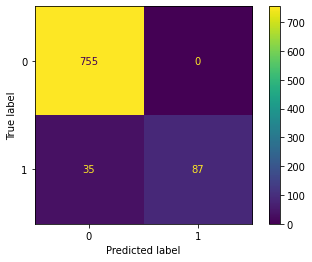

In [9]:
plot_confusion_matrix(neigh, X_test, y_test)